# To test out wide to long in pandas

- Read the data from HandBookData.xlsx
- read only the required cells [A1:AB1827]
- change from wide to long using pandas functionality.
- Use the statistics obtained from test1 notebook
- Write a model using SVR using multiple variables.
- Look for a way to tune the model

In [1]:
import pandas as pd
import numpy as np
import openpyxl
from datetime import datetime, timedelta
from os.path import join, splitext

In [2]:
data = pd.read_excel('HandBookData.xlsx', sheet_name='DPLLoad', engine='openpyxl', usecols='A:AB', nrows=1826)

data.sample(5)

,Season,Month,DOW,DT,HR1,HR2,HR3,HR4,HR5,HR6,...,HR15,HR16,HR17,HR18,HR19,HR20,HR21,HR22,HR23,HR24
146,Spring,5,Monday,2013-05-27,1264,1216.0,1174.0,1154,1161,1182,...,1535,1549,1589,1623,1657,1682,1717,1763,1689,1583
1532,Spring,3,Monday,2017-03-13,1884,1870.0,1868.0,1880,1926,2068,...,2264,2236,2246,2306,2318,2346,2395,2333,2215,2110
699,Winter,12,Monday,2014-12-01,1488,1451.0,1456.0,1475,1534,1682,...,2265,2261,2276,2414,2458,2445,2411,2339,2219,2111
929,Summer,7,Sunday,2015-07-19,1876,1757.0,1667.0,1615,1584,1581,...,2445,2455,2520,2604,2591,2403,2351,2311,2198,2056
776,Winter,2,Monday,2015-02-16,2356,2337.0,2326.0,2336,2370,2491,...,2779,2740,2726,2766,2852,2851,2782,2675,2557,2457


In [3]:
data.head()

,Season,Month,DOW,DT,HR1,HR2,HR3,HR4,HR5,HR6,...,HR15,HR16,HR17,HR18,HR19,HR20,HR21,HR22,HR23,HR24
0,Winter,1,Tuesday,2013-01-01,1723,1674.0,1622.0,1595,1591,1629,...,1900,1906,1934,2089,2184,2173,2149,2084,2005,1934
1,Winter,1,Wednesday,2013-01-02,1874,1846.0,1851.0,1865,1921,2067,...,2307,2285,2307,2468,2564,2555,2507,2443,2323,2204
2,Winter,1,Thursday,2013-01-03,2141,2105.0,2076.0,2094,2133,2254,...,2314,2287,2305,2444,2527,2489,2439,2350,2227,2087
3,Winter,1,Friday,2013-01-04,1989,1942.0,1897.0,1907,1955,2086,...,2225,2188,2204,2325,2435,2404,2366,2293,2185,2060
4,Winter,1,Saturday,2013-01-05,1961,1914.0,1879.0,1880,1897,1967,...,1944,1961,2005,2104,2169,2125,2086,2017,1931,1825


In [4]:
long_data = pd.wide_to_long(data, stubnames='HR', i=['Season','Month','DT','DOW'], j='hour')

long_data.sample(5)

HR
Season Month DT         DOW       hour        
Summer 8     2013-08-11 Sunday    1     1750.0
Winter 12    2013-12-05 Thursday  3     1512.0
Fall   11    2014-11-05 Wednesday 12    2032.0
             2013-11-08 Friday    24    1768.0
Winter 12    2017-12-15 Friday    3     2137.0

In [5]:
long_data.reset_index(inplace=True)

long_data.sample(5)

,Season,Month,DT,DOW,hour,HR
12066,Spring,5,2014-05-18,Sunday,19,1529.0
23764,Fall,9,2015-09-18,Friday,5,1527.0
13132,Summer,7,2014-07-02,Wednesday,5,1664.0
26538,Winter,1,2016-01-11,Monday,19,2726.0
28271,Spring,3,2016-03-23,Wednesday,24,1666.0


Lets make some plots
- data from 2017 during seasons at hour 1

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.constants import golden as phi

<AxesSubplot:xlabel='hour', ylabel='HR'>

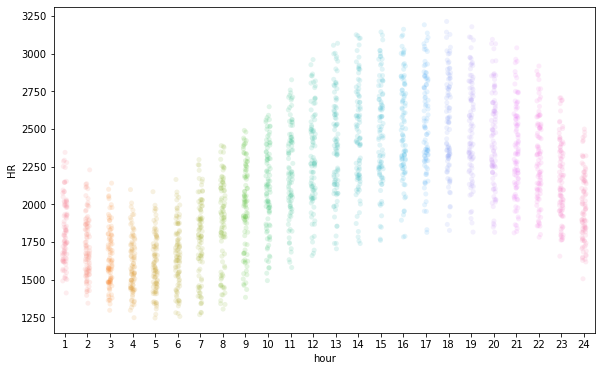

In [7]:
data = long_data.loc[(long_data['DT'].dt.year == 2017) & (long_data['Season'] == 'Summer')]

height = 6
fig = plt.figure(figsize=(phi * height,height))
sns.stripplot(data = data, x='hour', y='HR',alpha=0.15)

- Turn values into categorical

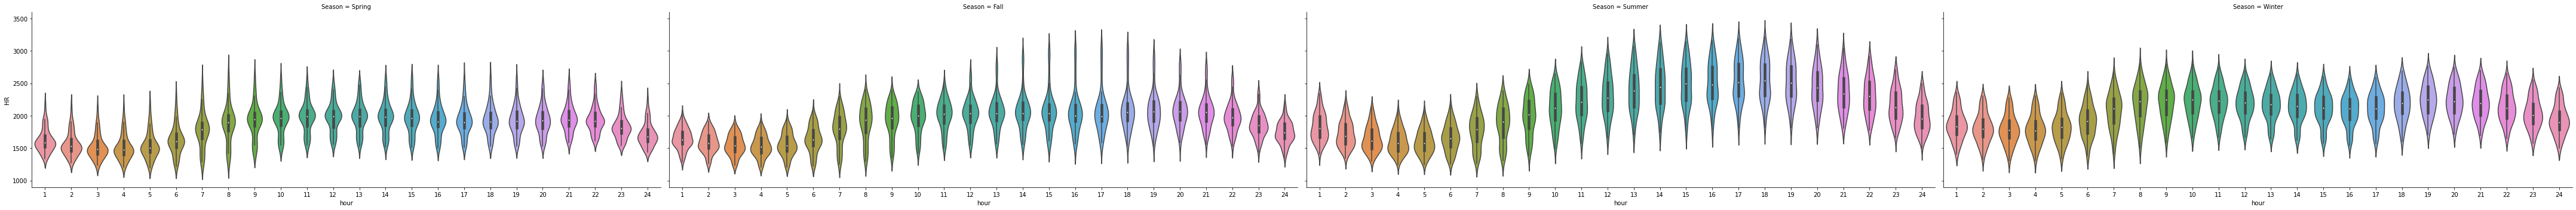

In [8]:
data = long_data.loc[(long_data['DT'].dt.year == 2017)]

sns.catplot(data = data, x='hour', y='HR',alpha=0.15, col='Season', kind='violin', aspect=3, col_order=['Spring','Fall','Summer','Winter'])

**2017 Sesonal trend**

We can see that in 2017 Spring and Fall have quite consistent points, they are clustered close to each other. On the other hand Summer and Winter data is quite scattered. 

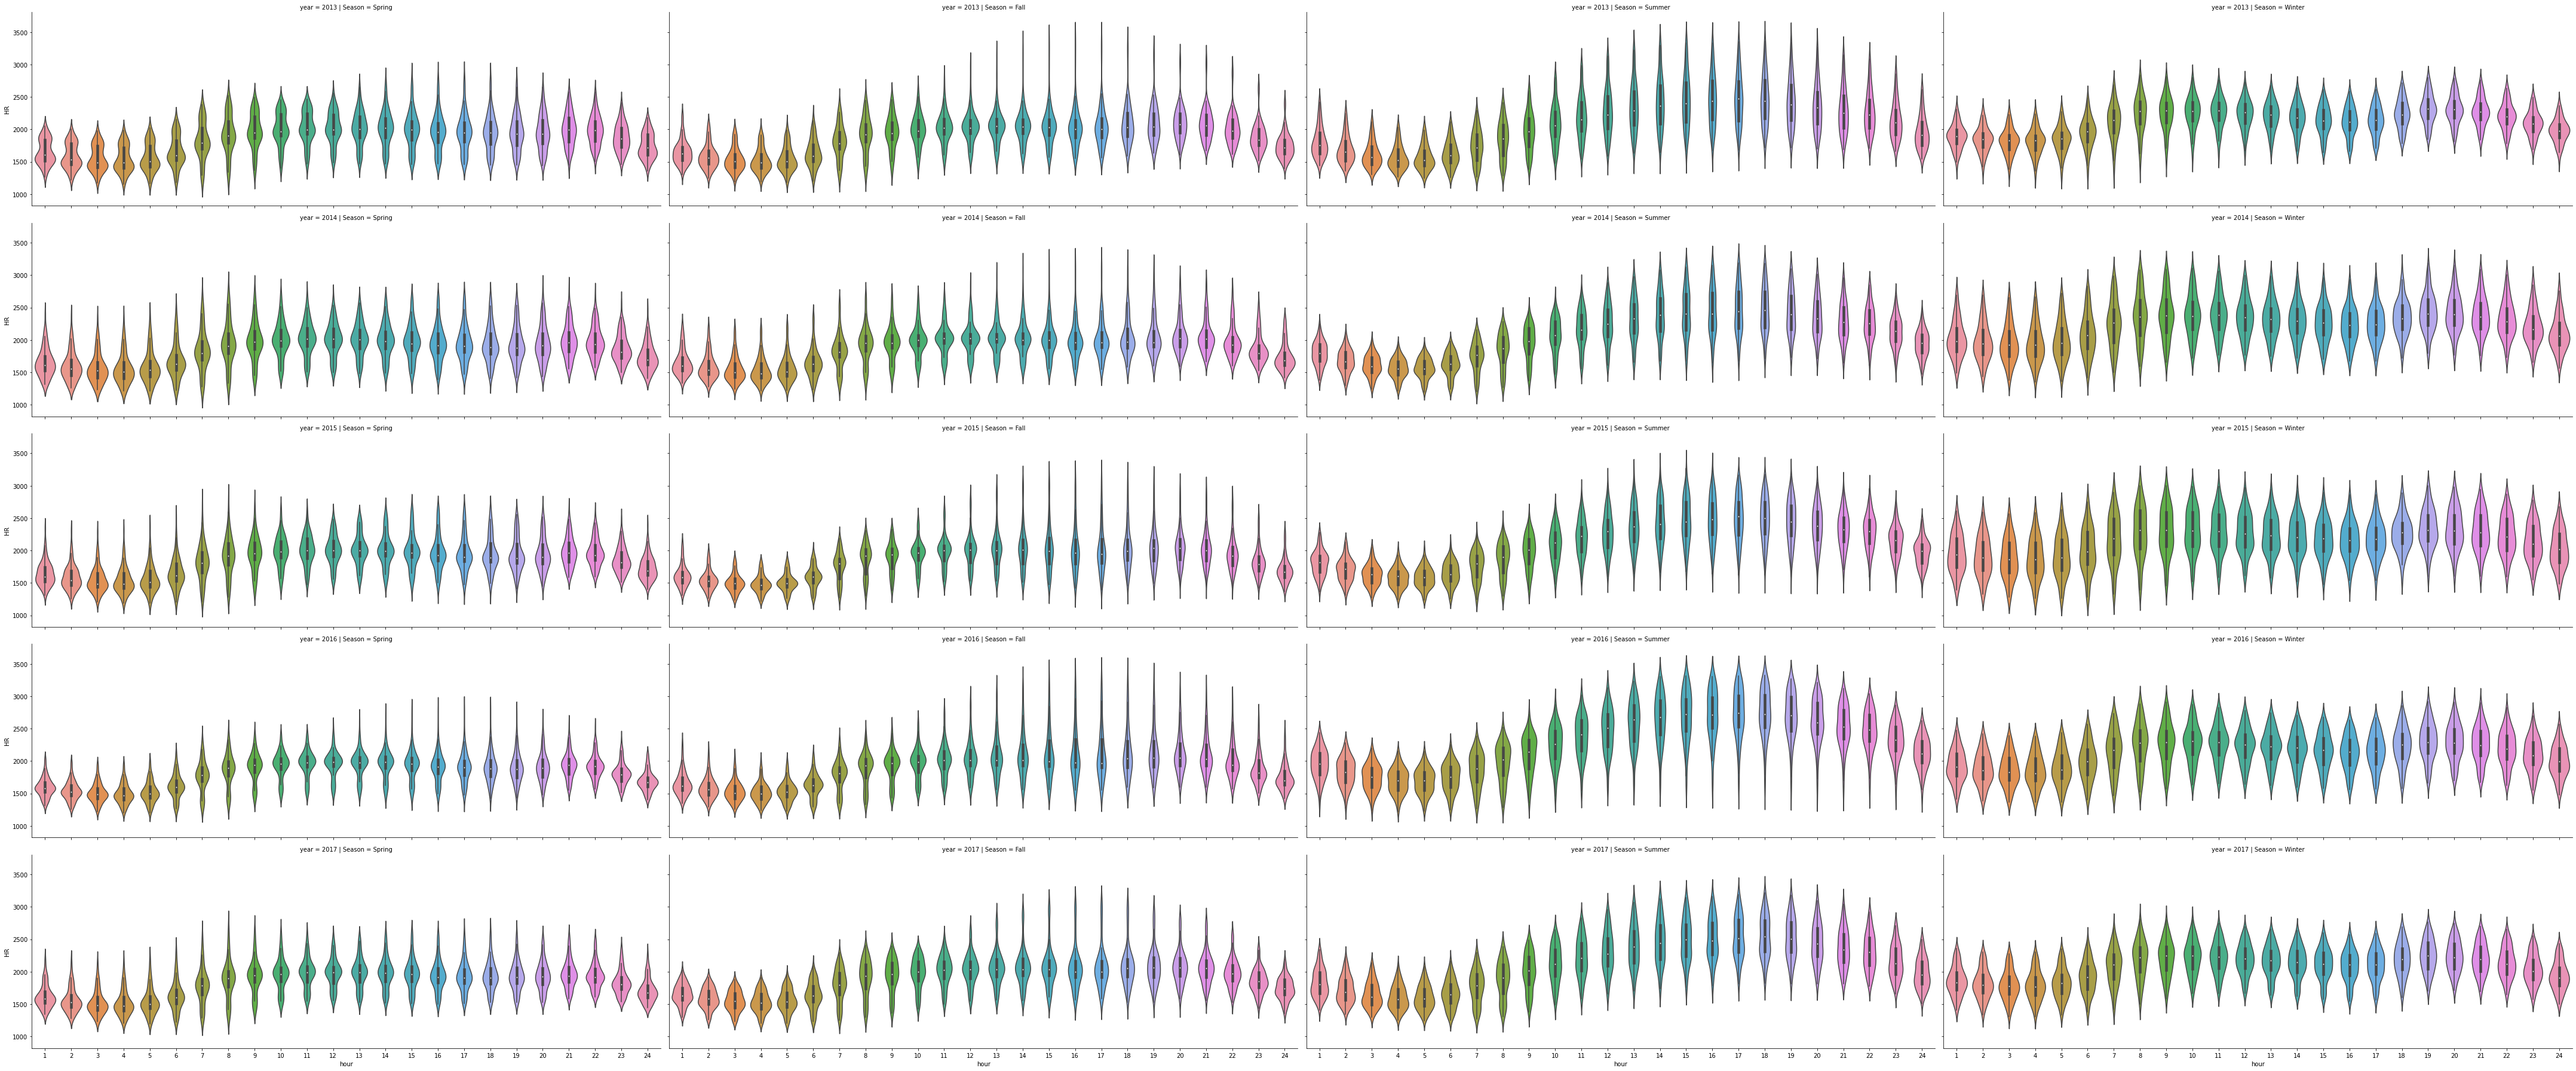

In [9]:
data = long_data.copy(deep=True)

data['year'] = data['DT'].dt.year

sns.catplot(data = data, x='hour', y='HR',alpha=0.15, col='Season', row='year', kind='violin', aspect=3, col_order=['Spring','Fall','Summer','Winter'])

We can see that for all the years the hourly load in spring and fall is quite consistent over all the days while just like 2017, the hourly load in summer and winter is quite spread out.

In [10]:
long_data['Season'] = long_data['Season'].astype('category')

In [11]:
labels = ['Night', 'Day', 'Day','Night']

long_data['TimeOfDay'] = pd.cut(long_data['hour'].values, bins=range(0,25,6), right=True, labels = labels, ordered=False)

long_data.sample(5)

,Season,Month,DT,DOW,hour,HR,TimeOfDay
20813,Spring,5,2015-05-18,Monday,6,1736.0,Night
16047,Fall,10,2014-10-31,Friday,16,2022.0,Day
43231,Winter,12,2017-12-07,Thursday,8,2379.0,Day
36598,Spring,3,2017-03-05,Sunday,23,1662.0,Night
42203,Fall,10,2017-10-25,Wednesday,12,2049.0,Day


In [12]:
long_data['Season']

0        Winter
1        Winter
2        Winter
3        Winter
4        Winter
          ...  
43819    Winter
43820    Winter
43821    Winter
43822    Winter
43823    Winter
Name: Season, Length: 43824, dtype: category
Categories (4, object): ['Fall', 'Spring', 'Summer', 'Winter']

In [13]:
weather_data = pd.read_excel('HandBookData.xlsx', sheet_name='DPLWeather', engine='openpyxl')

weather_data.sample(5)

,dt,MaxTemp,AvgTemp,LowTemp,MaxDewPoint,AvgDepPoint,LowDewPoint,MaxRelHumidity,AvgRelHumidity,LowHumidity,...,AvgPressure,LowPressure,MaxVisibility,AvgVisibility,LowVisibility,MaxWindSpeed,AvgWindSpeed,MaxGust,Precipitation,EventCategory
1105,2016-01-11,26,16,6,22,10,3,88,78,67,...,30.08,29.83,10,8,2,24,13,30,0.01,16.0
1175,2016-03-21,51,39,26,26,23,20,75,55,34,...,30.15,30.12,10,10,10,24,11,30,0,99.0
523,2014-06-08,74,68,62,66,60,53,90,72,53,...,29.83,29.71,10,8,1,24,10,30,0.16,11.0
594,2014-08-18,88,78,67,68,66,63,87,67,46,...,29.85,29.80,10,8,4,10,5,13,0,99.0
1645,2017-07-04,86,76,65,69,67,63,100,79,58,...,30.06,30.03,10,10,5,14,6,19,0,99.0


In [14]:
complete_data = long_data.set_index('DT').join(weather_data.set_index('dt'))

complete_data.reset_index(inplace=True)
complete_data.sample(5)

,index,Season,Month,DOW,hour,HR,TimeOfDay,MaxTemp,AvgTemp,LowTemp,...,AvgPressure,LowPressure,MaxVisibility,AvgVisibility,LowVisibility,MaxWindSpeed,AvgWindSpeed,MaxGust,Precipitation,EventCategory
36264,2017-02-20,Winter,2,Monday,1,1579.0,Night,65,50,34,...,30.20,30.08,10,4,0,14,6,20,0,1.0
29888,2016-05-30,Spring,5,Monday,9,1544.0,Day,86,74,61,...,30.01,29.96,10,10,7,15,4,22,0,99.0
12851,2014-06-20,Summer,6,Friday,12,2522.0,Day,83,75,67,...,29.99,29.92,10,8,2,16,5,20,0.27,15.0
664,2013-01-28,Winter,1,Monday,17,2160.0,Day,50,42,33,...,30.07,30.01,7,3,0,21,15,28,0.23,2.0
11307,2014-04-17,Spring,4,Thursday,4,1686.0,Night,67,50,33,...,30.31,30.27,10,10,10,20,10,26,0,99.0


In [15]:
data = complete_data.loc[complete_data['index'].dt.year == 2017]

data.tail()

,index,Season,Month,DOW,hour,HR,TimeOfDay,MaxTemp,AvgTemp,LowTemp,...,AvgPressure,LowPressure,MaxVisibility,AvgVisibility,LowVisibility,MaxWindSpeed,AvgWindSpeed,MaxGust,Precipitation,EventCategory
43819,2017-12-31,Winter,12,Sunday,20,2484.0,Night,11,3,-5,...,30.5,30.41,10,7,1,10,6,12,0.05,NaN
43820,2017-12-31,Winter,12,Sunday,21,2452.0,Night,11,3,-5,...,30.5,30.41,10,7,1,10,6,12,0.05,NaN
43821,2017-12-31,Winter,12,Sunday,22,2421.0,Night,11,3,-5,...,30.5,30.41,10,7,1,10,6,12,0.05,NaN
43822,2017-12-31,Winter,12,Sunday,23,2375.0,Night,11,3,-5,...,30.5,30.41,10,7,1,10,6,12,0.05,NaN
43823,2017-12-31,Winter,12,Sunday,24,2345.0,Night,11,3,-5,...,30.5,30.41,10,7,1,10,6,12,0.05,NaN


<AxesSubplot:xlabel='index', ylabel='MaxTemp'>

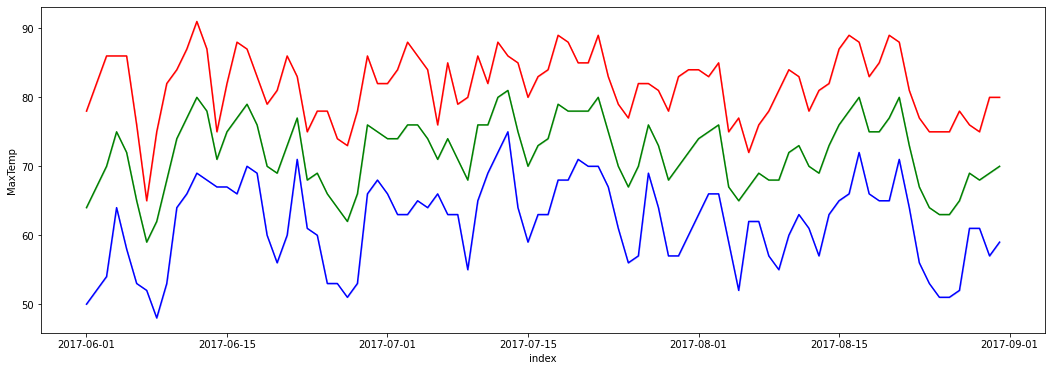

In [16]:
data = complete_data.loc[(complete_data['index'].dt.year == 2017) & (complete_data['Season'] == 'Summer')]
fig = plt.figure(figsize=(6*3, 6))
sns.lineplot(data=data, x='index', y='MaxTemp', color='r')
sns.lineplot(data=data, x='index', y='LowTemp', color='b')
sns.lineplot(data=data, x='index', y='AvgTemp', color='g')
# sns.relplot(data=data, x='index', y='MaxTemp','LowTemp', kind='line', aspect=3)

In [17]:
data = complete_data.copy(deep=True)
data['MaxGustNew'] = data['MaxGust'].replace('-', '0', regex=False)

# data.loc[data['MaxGustNew'].notna()]
complete_data['MaxGust'] = data['MaxGustNew']
complete_data['MaxGust'] = complete_data['MaxGust'].astype(np.float64)

In [18]:
complete_data['EventCategory'] = complete_data['EventCategory'].fillna('99')
complete_data['EventCategory'] = complete_data['EventCategory'].astype('category')
complete_data['DOW'] = complete_data['DOW'].astype('category')
complete_data['Month'] = complete_data['Month'].astype('category')
complete_data['hour'] = complete_data['hour'].astype('category')

In [19]:
complete_data['Precipitation'] = complete_data['Precipitation'].replace('T', '99', regex=False)
complete_data['Precipitation'] = complete_data['Precipitation'].astype(np.float64)

In [20]:
complete_data.dtypes

index             datetime64[ns]
Season                  category
Month                   category
DOW                     category
hour                    category
HR                       float64
TimeOfDay               category
MaxTemp                    int64
AvgTemp                    int64
LowTemp                    int64
MaxDewPoint                int64
AvgDepPoint                int64
LowDewPoint                int64
MaxRelHumidity             int64
AvgRelHumidity             int64
LowHumidity                int64
MaxPressure              float64
AvgPressure              float64
LowPressure              float64
MaxVisibility              int64
AvgVisibility              int64
LowVisibility              int64
MaxWindSpeed               int64
AvgWindSpeed               int64
MaxGust                  float64
Precipitation            float64
EventCategory           category
dtype: object

In [52]:
complete_data = complete_data.dropna()

In [102]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown="ignore")
ohe.fit(complete_data[['Season', 'TimeOfDay', 'DOW']])

print(ohe.categories_)
ohe_data = ohe.transform(complete_data[['Season', 'TimeOfDay', 'DOW']]).toarray()
print(ohe_data.shape)

###########################################################

x_data = complete_data.drop(['index','HR', 'Season','TimeOfDay', 'DOW'], axis=1).values
print(x_data.shape)

x_data = np.concatenate((x_data, ohe_data), axis=1)
print(x_data.shape)

y_data = complete_data['HR'].values
print(y_data.shape)

[array(['Fall', 'Spring', 'Summer', 'Winter'], dtype=object), array(['Day', 'Night'], dtype=object), array(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'], dtype=object)]
(43814, 13)
(43814, 22)
(43814, 35)
(43814,)


In [103]:
x_data = x_data.astype('float')

In [104]:
x_data[1]

array([1.000e+00, 2.000e+00, 3.200e+01, 2.600e+01, 2.000e+01, 3.100e+01,
       2.500e+01, 1.600e+01, 1.000e+02, 8.400e+01, 6.800e+01, 3.017e+01,
       3.009e+01, 3.003e+01, 1.000e+01, 5.000e+00, 2.000e+00, 1.400e+01,
       5.000e+00, 1.500e+01, 2.000e-02, 1.600e+01, 0.000e+00, 0.000e+00,
       0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00])

In [115]:
x_train = x_data[:-2208]
x_test = x_data[-2208:]

y_train = y_data[:-2208].reshape(-1, 1)
y_test = y_data[-2208:].reshape(-1, 1)

print(f'Train: {x_train.shape} | Test: {x_test.shape}')

from sklearn.svm import SVR

model = SVR(kernel='poly', degree=5)

model.fit(x_train, y_train)

model.score(x_test, y_test)
# model.score(x_train, y_train)

Train: (41606, 35) | Test: (2208, 35)


/home/divyaksh/Documents/Coding/python/forecasting/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: 

In [116]:
x_train = x_data[:-2208]
x_test = x_data[-2208:]

y_train = y_data[:-2208].reshape(-1, 1)
y_test = y_data[-2208:].reshape(-1, 1)

print(f'Train: {x_train.shape} | Test: {x_test.shape}')

from sklearn.svm import SVR

model = SVR(kernel='poly', degree=5, max_iter=200)

model.fit(x_train, y_train)

model.score(x_test, y_test)
# model.score(x_train, y_train)

Train: (41606, 35) | Test: (2208, 35)


/home/divyaksh/Documents/Coding/python/forecasting/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/divyaksh/Documents/Coding/python/forecasting/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


-0.2826764190068365

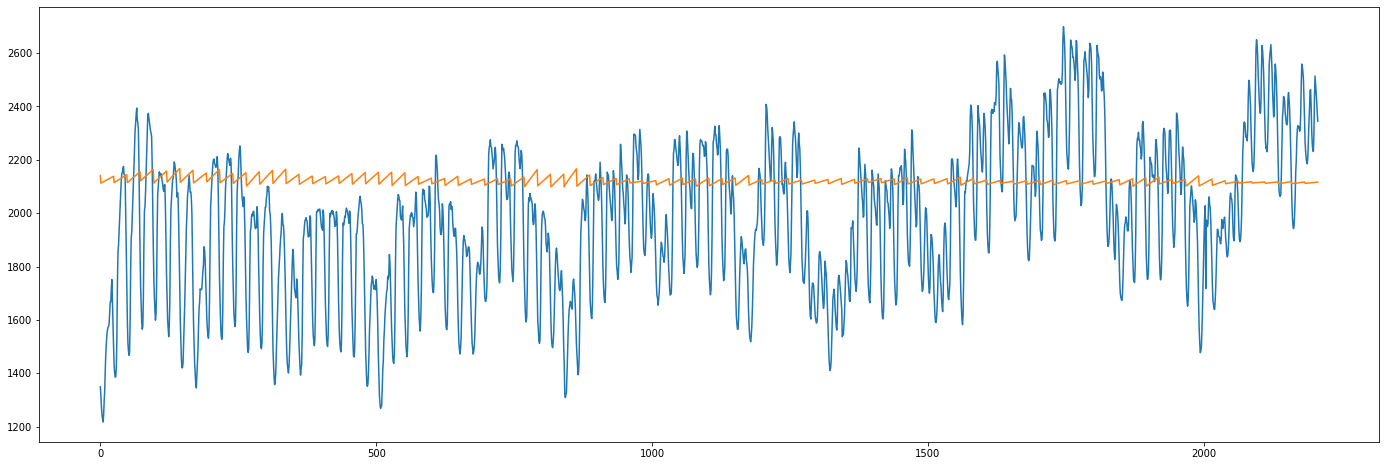

In [122]:
fig = plt.figure(figsize=(24,8))
plt.plot(y_test)
plt.plot(model.predict(x_test))

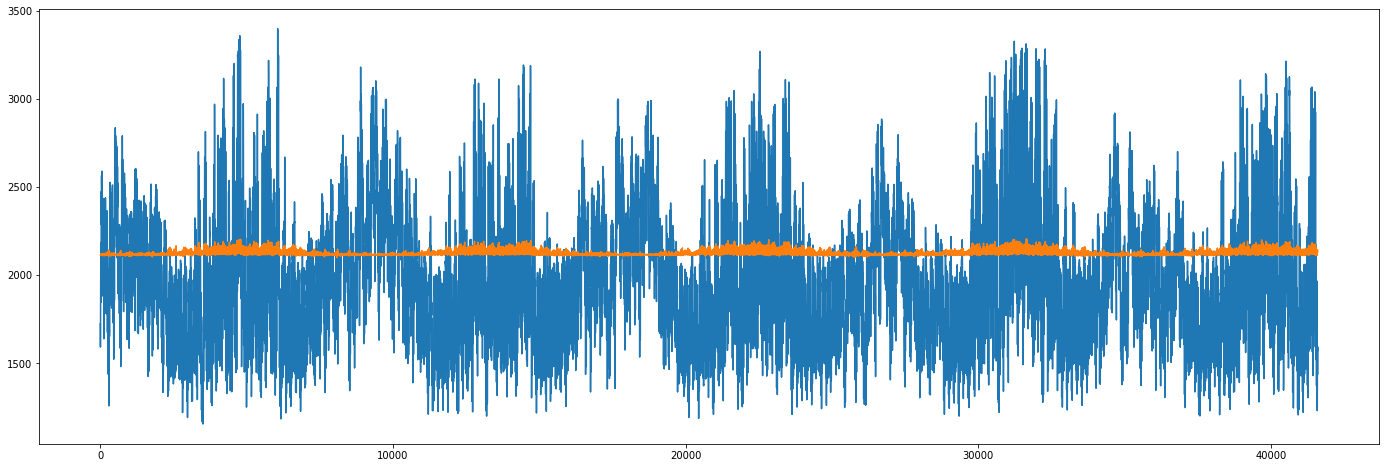

In [123]:
fig = plt.figure(figsize=(24,8))
plt.plot(y_train)
plt.plot(model.predict(x_train))